# *Developing a function for the XG Boost Algorithm and applying dataset to this model*

Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
import time
from sklearn.model_selection import train_test_split


Mounting Google Drive to access the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Creating a function to buld and train the ML Model

In [ ]:
# Reading data from csv file
dataset = pd.read_csv("/content/drive/MyDrive/ML_2023/processed_dataset.csv")

X = pd.DataFrame(dataset.iloc[:, 0:4].values)
y = dataset.iloc[:, 4].values

# Generating training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 123)


# Instantiate an XGBoost object with hyperparameters
xgb_reg = xgb.XGBRegressor(n_estimators=100, objective='reg:linear', seed = 123)

# Train the model with train data sets
start_time = time.time()
xgb_reg.fit(X_train, y_train)
end_time = time.time()
fit_time = end_time - start_time
print("Fit Time:", fit_time, "seconds")

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [10:42:45] WARNING: /workspace/src/objective/regression_obj.cu:209: reg:linear is now deprecated in favor of reg:squarederror.
  warnings.warn(smsg, UserWarning)


Fit Time: 4.1815720100402832 seconds


In [ ]:
start_time = time.time()
y_pred = xgb_reg.predict(X_test) # Predictions
y_true = y_test # True values
end_time = time.time()
prediction_time = end_time - start_time


In [ ]:
# Prediction Metrics

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

MSE = mse(y_true, y_pred)
R2 = r2_score(y_true, y_pred)
MAX_ERROR = max_error(y_true, y_pred);
MEAN_ABSOLUTE_ERROR = mean_absolute_error(y_true, y_pred)
MAPE = mean_absolute_percentage_error(y_test, y_pred)

print("Mean Squared Error", MSE)
print("R-Squared: ", R2)
print("Max Error", MAX_ERROR);
print("Mean Absolute Error", MEAN_ABSOLUTE_ERROR);
print("Prediction Time:", prediction_time, "seconds");
print("MAPE", MAPE);

Mean Squared Error 4.26298783432971
R-Squared:  0.8075438331455279
Max Error 22.080680443317874
Mean Absolute Error 1.1113889389564384
Prediction Time: 0.016656742477416992 seconds
MAPE 0.12227031515314825


Create a function that will plot a graph between the predicted and actual values

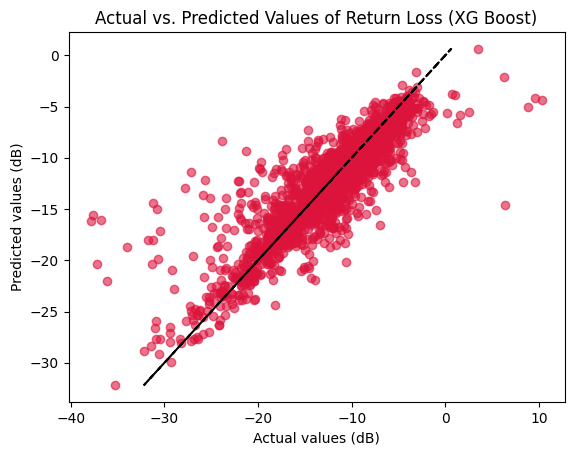

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=y_test, y=y_pred, c='crimson', alpha=0.6)
plt.plot(y_pred, y_pred,color='black', linestyle='dashed')
plt.title('Actual vs. Predicted Values of Return Loss (XG Boost)')
plt.xlabel('Actual values (dB)')
plt.ylabel('Predicted values (dB)')
plt.show()